In [86]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Identificando el tipo de datos de cada encabezado

In [ ]:
print(tienda.dtypes)

Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
dtype: object


object → si es texto string

int64 → si es número entero

float64 → si es número decimal

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

**Ventas totales por tienda**

Para formatear los datos numericos presentados en los informes

In [60]:
def formato_latino(numero):
    return f'{numero:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

In [18]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

total_ventas = {tienda_: df['Precio'].sum() for tienda_, df in tiendas.items()}

for tienda_, total in total_ventas.items():
  print(f"\033[1mEl total de ventas de la {tienda_} es \033[0m: ${formato_latino(total)}")

El total de ventas de la Tienda 1 es : $1.150.880.400,00
El total de ventas de la Tienda 2 es : $1.116.343.500,00
El total de ventas de la Tienda 3 es : $1.098.019.600,00
El total de ventas de la Tienda 4 es : $1.038.375.700,00


En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [19]:
ventas_por_categoria = tienda.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t2 = tienda2.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t3 = tienda3.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')
ventas_por_categoria_t4 = tienda4.groupby(['Categoría del Producto']).size().reset_index(name='Cantidad Vendida')


In [22]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ventas_por_categoria = {
    tienda_: df.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
    for tienda_, df in tiendas.items()
}

In [23]:
ventas_ordenadas = {
    tienda_: df.sort_values('Cantidad Vendida', ascending=False)
    for tienda_, df in ventas_por_categoria.items()
}

In [29]:
for tienda_, df in ventas_ordenadas.items():
    print(f"\n\033[1m{tienda_} - Categorías ordenadas de forma descendente por cantidad vendida:\033[0m\n\n")
    print(df.to_string(index=False))


Tienda 1 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría del Producto  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171

Tienda 2 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría del Producto  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181

Tienda 3 - Categorías ordenadas de forma descendente por cantidad vendida:


 Categoría

In [31]:
for tienda_, df in ventas_ordenadas.items():
    print(f"\n\033[1m{tienda_} - Top 3 categorías más vendidas:\033[0m\n")
    print(df.head(3).to_string(index=False))


Tienda 1 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               465
          Electrónicos               448
              Juguetes               324

Tienda 2 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               442
          Electrónicos               422
              Juguetes               313

Tienda 3 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               499
          Electrónicos               451
              Juguetes               315

Tienda 4 - Top 3 categorías más vendidas:

Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338


**En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.**

**- Calificacion promedio total por tienda**

In [65]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

promedio_calificaciones_tienda = {
    tienda_: df['Calificación'].mean()
    for tienda_, df in tiendas.items()
}

In [70]:
from pprint import pprint

In [79]:
for tienda, promedio in promedio_calificaciones_tienda.items():
    print(f'\n\033[1mEl Promedio de todas las calificaciones por producto en la {tienda} es:\033[0m {promedio:.2f}')


El Promedio de todas las calificaciones por producto en la Tienda 1 es: 3.98

El Promedio de todas las calificaciones por producto en la Tienda 2 es: 4.04

El Promedio de todas las calificaciones por producto en la Tienda 3 es: 4.05

El Promedio de todas las calificaciones por producto en la Tienda 4 es: 4.00




**- Calificaciones por producto de cada tienda**


In [40]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

promedios_por_tienda = {
    tienda_: df.groupby('Producto')['Calificación'].mean().reset_index().sort_values(by='Calificación', ascending=False)
    for tienda_, df in tiendas.items()
}

In [62]:
for tienda_, df_promedio in promedios_por_tienda.items():
    print(f'\n\033[1mEl Promedio de calificaciones por producto en la {tienda_} (en orden descendente) son:\033[0m\n')
    print(df_promedio.to_string(index=False))


El Promedio de calificaciones por producto en la Tienda 1 (en orden descendente) son:

                   Producto  Calificación
          Ajedrez de madera      4.428571
  Iniciando en programación      4.292683
                 Cubertería      4.230769
                 Smartwatch      4.209302
                    Batería      4.188679
                  Impresora      4.166667
                Tablet ABXY      4.142857
  Carrito de control remoto      4.134615
                     Estufa      4.133333
           Lavadora de ropa      4.127660
                   Cama box      4.113636
              Kit de bancas      4.113636
Ciencia de datos con Python      4.102564
    Bloques de construcción      4.089286
         Guitarra eléctrica      4.085106
          Asistente virtual      4.075000
                     Sillón      4.073171
          Balón de voleibol      4.071429
            Cubo mágico 8x8      4.068182
              TV LED UHD 4K      4.050000
             Mesa de centro   

**En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.**

In [50]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Calcular y ordenar las ventas por producto para cada tienda
ventas_por_producto = {
    tienda_: df.groupby('Producto').size().reset_index(name='Cantidad Vendida').sort_values(by='Cantidad Vendida', ascending=False)
    for tienda_, df in tiendas.items()
}

In [80]:
for tienda_, df_ventas in ventas_por_producto.items():
    print(f'\n\033[1m\nLos 5 productos mas vendidos en la {tienda_} (en orden descendente) son:\033[0m\n')
    print(df.head(5).to_string(index=False))



Los 5 productos mas vendidos en la Tienda 1 (en orden descendente) son:

Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338
  Deportes y diversión               277
     Electrodomésticos               254


Los 5 productos mas vendidos en la Tienda 2 (en orden descendente) son:

Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338
  Deportes y diversión               277
     Electrodomésticos               254


Los 5 productos mas vendidos en la Tienda 3 (en orden descendente) son:

Categoría del Producto  Cantidad Vendida
               Muebles               480
          Electrónicos               451
              Juguetes               338
  Deportes y diversión               277
     Electrodomésticos               254


Los 5 productos mas vendidos en la 

In [82]:
for tienda_, df_ventas in ventas_por_producto.items():
    print(f'\n\033[1mLos 5 productos menos vendidos en la {tienda_} (en orden descendente):\033[0m\n')
    df_ordenado = df_ventas.sort_values(by='Cantidad Vendida', ascending=True)
    print(df_ordenado.head(5).to_string(index=False))


Los 5 productos menos vendidos en la Tienda 1 (en orden descendente):

                   Producto  Cantidad Vendida
               Celular ABXY                33
  Auriculares con micrófono                33
            Olla de presión                35
                  Pandereta                36
Ciencia de datos con Python                39

Los 5 productos menos vendidos en la Tienda 2 (en orden descendente):

       Producto  Cantidad Vendida
  Juego de mesa                32
      Impresora                34
Mesa de comedor                34
         Sillón                35
    Auriculares                37

Los 5 productos menos vendidos en la Tienda 3 (en orden descendente):

               Producto  Cantidad Vendida
Bloques de construcción                35
           Set de vasos                36
                Mochila                36
             Microondas                36
           Vaso térmico                38

Los 5 productos menos vendidos en la Tienda 4 (en o

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
tienda.head()

In [95]:
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Calcular el promedio del costo de envío para cada tienda
promedio_envio_por_tienda = {
    tienda_: df['Costo de envío'].mean()
    for tienda_, df in tiendas.items()
}

for tienda_, promedio in promedio_envio_por_tienda.items():
    print(f'\n\033[1mEl costo de envio promedio de la {tienda_} es:\033[0m $ {formato_latino(promedio)}')



El costo de envio promedio de la Tienda 1 es: $ 26.018,61

El costo de envio promedio de la Tienda 2 es: $ 25.216,24

El costo de envio promedio de la Tienda 3 es: $ 24.805,68

El costo de envio promedio de la Tienda 4 es: $ 23.459,46


In [118]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [106]:
import matplotlib.pyplot as plt

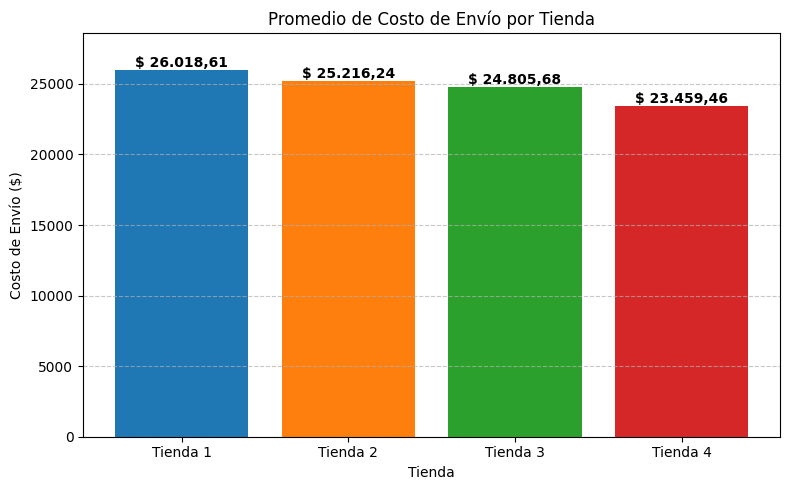

In [120]:
# Nombres de las tiendas y valores promedio de envío
nombres_tiendas = list(promedio_envio_por_tienda.keys())
valores_promedio = list(promedio_envio_por_tienda.values())

# Colores personalizados para cada tienda
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, Naranja, Verde, Rojo

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.bar(nombres_tiendas, valores_promedio, color=colores)
ax.set_title('Promedio de Costo de Envío por Tienda')
ax.set_ylabel('Costo de Envío ($)')
ax.set_xlabel('Tienda')
##ax.set_ylim(0, max{formato_latino(valores_promedio) * 1.1})
ax.set_ylim(0, max(valores_promedio) * 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.7)


# Añadir etiquetas de valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'$ {formato_latino(altura)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

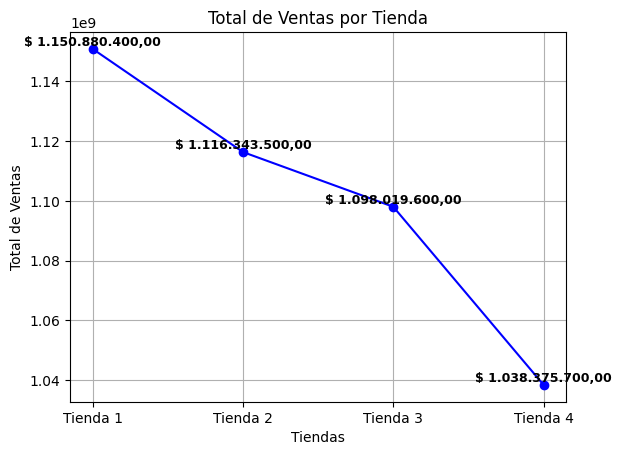

In [126]:
# Datos para el gráfico
nombres_tiendas = list(total_ventas.keys())
valores_ventas = list(total_ventas.values())

# Crear gráfico de líneas
plt.plot(nombres_tiendas, valores_ventas, marker='o', linestyle='-', color='blue')

for i, valor in enumerate(valores_ventas):
    plt.text(nombres_tiendas[i], valor, f'$ {formato_latino(valor)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Personalización del gráfico
plt.title('Total de Ventas por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Total de Ventas')
plt.grid(True)

# Mostrar gráfico
plt.show()

Esto debo revisarlo

In [ ]:
ventas_ordenadas = ventas_por_categoria.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t2 = ventas_por_categoria_t2.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t3 = ventas_por_categoria_t3.sort_values('Cantidad Vendida', ascending=False)
ventas_ordenadas_t4 = ventas_por_categoria_t4.sort_values('Cantidad Vendida', ascending=False)

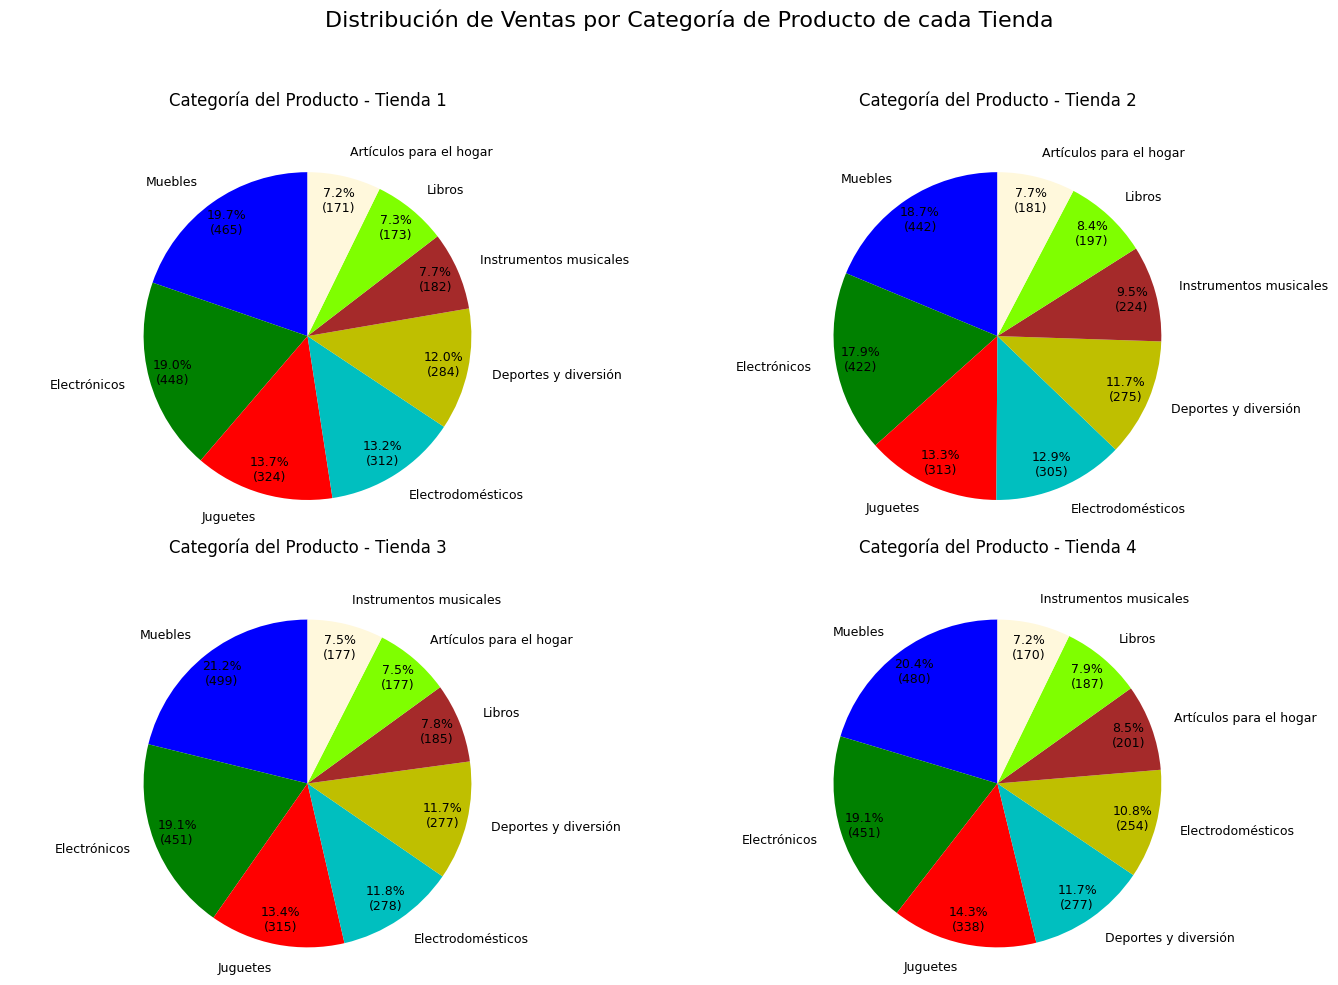

In [ ]:
# Lista de colores personalizados (puedes agregar más colores aquí si necesitas más)
colores = ['#0000FF', '#008000', '#FF0000', '#00BFBF', '#BFBF00', '#A52A2A', '#7FFF00', '#FFF8DC']

# Función para etiquetas con porcentaje y cantidad
def etiquetar(pct, allvals):
    cantidad = int(round(pct / 100. * sum(allvals)))
    return f'{pct:.1f}%\n({cantidad})'

# Datos por tienda
datos_tiendas = [
    (ventas_ordenadas, 'Tienda 1'),
    (ventas_ordenadas_t2, 'Tienda 2'),
    (ventas_ordenadas_t3, 'Tienda 3'),
    (ventas_ordenadas_t4, 'Tienda 4')
]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for ax, (df, nombre) in zip(axs.flat, datos_tiendas):
    categorias = df['Categoría del Producto']  # Asegúrate de que el nombre sea correcto
    cantidades = df['Cantidad Vendida']



    # Crear gráfico circular con los colores seleccionados
    ax.pie(
        cantidades,
        labels=categorias,
        autopct=lambda pct: etiquetar(pct, cantidades),
        colors=colores,
        startangle=90,
        textprops={'fontsize': 9},
        labeldistance=1.15,  # Línea guía
        pctdistance=0.85     # Porcentaje más visible
    )
    ax.set_title(f'Categoría del Producto - {nombre}\n\n', fontsize=12)
    ax.axis('equal')  # Para que sea circular

plt.suptitle('Distribución de Ventas por Categoría de Producto de cada Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()